In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

C:\Users\afunn\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


In [4]:
release_dates = pd.DataFrame.from_csv('data/release_dates.csv', index_col=None,
                                      parse_dates=['date'], infer_datetime_format=True)
release_dates.head()

C:\Users\afunn\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  


,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#AnonOccupy: Bio of a Villain,2015,USA,2015-11-05
2,#Beings,2015,Romania,2015-01-29
3,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
4,#Nerealnaya lyubov,2014,Russia,2014-02-13


### Make a bar plot of the months in which movies with "Christmas" in their title tend to be released in the USA.

In [6]:
c = cast
r = release_dates
c.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


In [7]:
r.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#AnonOccupy: Bio of a Villain,2015,USA,2015-11-05
2,#Beings,2015,Romania,2015-01-29
3,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
4,#Nerealnaya lyubov,2014,Russia,2014-02-13


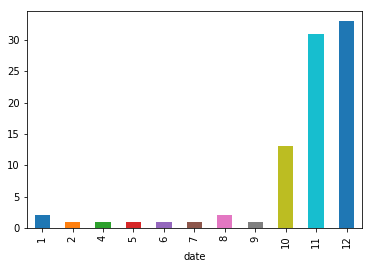

In [11]:
r[(r.title.str.contains("Christmas"))&(r.country=="USA")].groupby(r.date.dt.month).size().plot(kind='bar')

### Make a bar plot of the months in which movies whose titles start with "The Hobbit" are released in the USA.

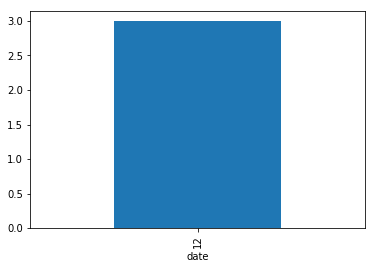

In [12]:
r[(r.title.str.startswith("The Hobbit"))&(r.country=="USA")].groupby(r.date.dt.month).size().plot(kind='bar')

### Make a bar plot of the day of the week on which movies with "Romance" in their title tend to be released in the USA.

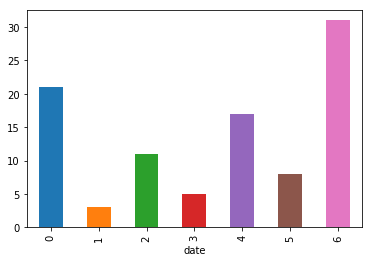

In [13]:
r[(r.title.str.contains("Romance"))&(r.country=="USA")].groupby(r.date.dt.dayofweek).size().plot(kind='bar')

### Make a bar plot of the day of the week on which movies with "Action" in their title tend to be released in the USA.

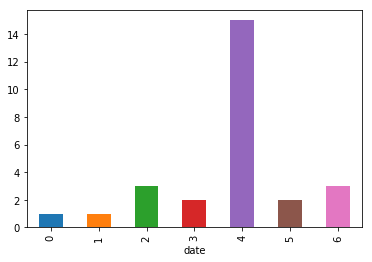

In [14]:
r[(r.title.str.contains("Action"))&(r.country=="USA")].groupby(r.date.dt.dayofweek).size().plot(kind='bar')

### On which date was each Judi Dench movie from the 1990s released in the USA?

In [15]:
c.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


In [16]:
r.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#AnonOccupy: Bio of a Villain,2015,USA,2015-11-05
2,#Beings,2015,Romania,2015-01-29
3,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
4,#Nerealnaya lyubov,2014,Russia,2014-02-13


In [26]:
a3 = c[(c.name == "Judi Dench") & (c.year >=1990) & (c.year<2000)]

a3a = a3.merge(r[r.country=="USA"])
a3a

,title,year,name,type,character,n,country,date
0,GoldenEye,1995,Judi Dench,actress,M,6.0,USA,1995-11-17
1,Hamlet,1996,Judi Dench,actress,Hecuba,12.0,USA,1996-12-25
2,Jack & Sarah,1995,Judi Dench,actress,Margaret,3.0,USA,1996-03-22
3,Mrs Brown,1997,Judi Dench,actress,Queen Victoria,1.0,USA,1997-07-18
4,Shakespeare in Love,1998,Judi Dench,actress,Queen Elizabeth,12.0,USA,1999-01-08
5,Tea with Mussolini,1999,Judi Dench,actress,Arabella,2.0,USA,1999-05-14
6,The World Is Not Enough,1999,Judi Dench,actress,M,6.0,USA,1999-11-19
7,Tomorrow Never Dies,1997,Judi Dench,actress,M,9.0,USA,1997-12-19


In [29]:
a3a[['title','date']]

,title,date
0,GoldenEye,1995-11-17
1,Hamlet,1996-12-25
2,Jack & Sarah,1996-03-22
3,Mrs Brown,1997-07-18
4,Shakespeare in Love,1999-01-08
5,Tea with Mussolini,1999-05-14
6,The World Is Not Enough,1999-11-19
7,Tomorrow Never Dies,1997-12-19


### In which months do films with Judi Dench tend to be released in the USA?

In [30]:
a4 = c[(c.name == "Judi Dench")]
a4a = a4.merge(r[r.country=="USA"])
a4a.head()

,title,year,name,type,character,n,country,date
0,84 Charing Cross Road,1987,Judi Dench,actress,Nora Doel,3.0,USA,1987-02-13
1,A Handful of Dust,1988,Judi Dench,actress,Mrs. Beaver,13.0,USA,1988-06-24
2,A Study in Terror,1965,Judi Dench,actress,Sally,8.0,USA,1966-08-10
3,Casino Royale,2006,Judi Dench,actress,M,4.0,USA,2006-11-17
4,Chocolat,2000,Judi Dench,actress,Armande Voizin,18.0,USA,2001-01-19


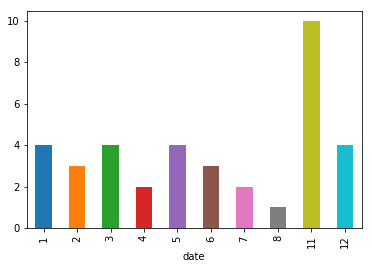

In [33]:
a4a.groupby(a4a.date.dt.month).size().plot(kind = 'bar')

### In which months do films with Tom Cruise tend to be released in the USA?

In [34]:
a5 = c[(c.name == "Tom Cruise")]
a5a = a5.merge(r[r.country=="USA"])
a5a.head()

,title,year,name,type,character,n,country,date
0,A Few Good Men,1992,Tom Cruise,actor,Lt. Daniel Kaffee,1.0,USA,1992-12-11
1,All the Right Moves,1983,Tom Cruise,actor,Stefen Djordjevic,1.0,USA,1983-10-21
2,Austin Powers in Goldmember,2002,Tom Cruise,actor,Himself,81.0,USA,2002-07-26
3,Austin Powers in Goldmember,2002,Tom Cruise,actor,Famous Austin ('Austinpussy'),81.0,USA,2002-07-26
4,Born on the Fourth of July,1989,Tom Cruise,actor,Ron Kovic,1.0,USA,1990-01-05


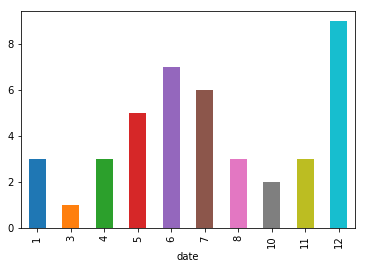

In [36]:
a5a.groupby(a5a.date.dt.month).size().plot(kind='bar')